### Import Libraries 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

### Import the dataset

In [2]:
series = pd.read_csv('daily-min-temperatures.csv', index_col=0)
series.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


### Plot the Time-series 

Text(0, 0.5, 'Min Temp')

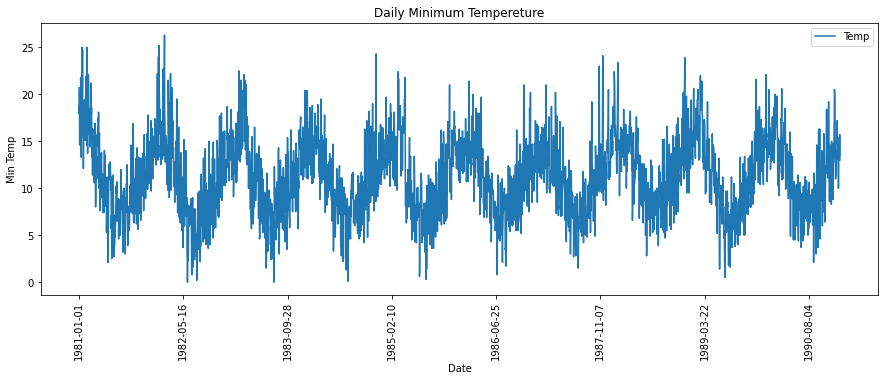

In [3]:
series.plot(figsize=(15, 5))
plt.xticks(rotation=90)
plt.title("Daily Minimum Tempereture")
plt.ylabel('Min Temp')

### Important Libraries for Autoregressive Model
#Autoregressive can't be used if it doesn't have autocorrelation

In [14]:
from pandas.plotting import lag_plot, autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt

### Plotting the lag plot to visualize serial correlation

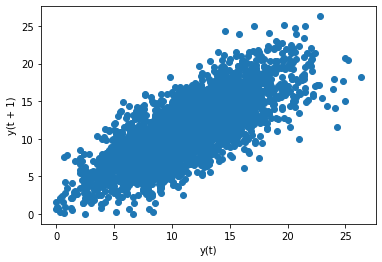

In [15]:
lag_plot(series)
plt.show()

### Serial correlation 

In [16]:
values = pd.DataFrame(series.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

         t-1      t+1
t-1  1.00000  0.77487
t+1  0.77487  1.00000


### Plot of Autocorrelation 


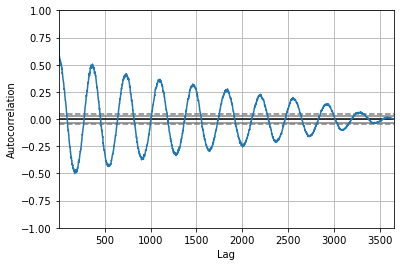

In [7]:
autocorrelation_plot(series)
plt.show()

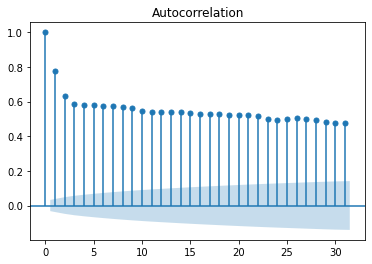

In [8]:
plot_acf(series, lags=31)
plt.show()

### Fitting Autoregression Model to Data

###### split dataset

In [9]:
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]
print('Train size is: {}'.format(train.shape[0]))
print('Test size is: {}'.format(test.shape[0]))

Train size is: 3642
Test size is: 7


##### train autoregression

In [10]:
model = AutoReg(train, lags=29)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

Coefficients: [ 5.57543506e-01  5.88595221e-01 -9.08257090e-02  4.82615092e-02
  4.00650265e-02  3.93020055e-02  2.59463738e-02  4.46675960e-02
  1.27681498e-02  3.74362239e-02 -8.11700276e-04  4.79081949e-03
  1.84731397e-02  2.68908418e-02  5.75906178e-04  2.48096415e-02
  7.40316579e-03  9.91622149e-03  3.41599123e-02 -9.11961877e-03
  2.42127561e-02  1.87870751e-02  1.21841870e-02 -1.85534575e-02
 -1.77162867e-03  1.67319894e-02  1.97615668e-02  9.83245087e-03
  6.22710723e-03 -1.37732255e-03]


##### make predictions

In [11]:
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted = %.3f, expected = %.3f' % (predictions[i], test[i]))

predicted = 11.871, expected = 12.900
predicted = 13.054, expected = 14.600
predicted = 13.533, expected = 14.000
predicted = 13.243, expected = 13.600
predicted = 13.091, expected = 13.500
predicted = 13.147, expected = 15.700
predicted = 13.176, expected = 13.000


### Accessing the accuracy of the Autoregression model

In [12]:
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 1.225


### Ploting Predicted Vs Actual curves 

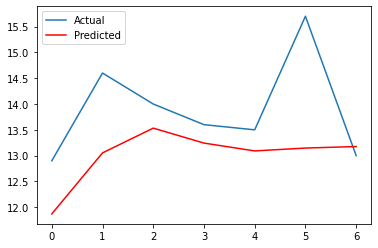

In [13]:
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.legend(['Actual', 'Predicted'])
plt.show()